J'ai crée se notebook juste pour éviter les problèmes de merge avec git (les .ipynb merge tres mal :-/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

In [2]:
# Load iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
#df['target'] = pd.Series(iris.target)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
# Standardizse the features
df_norm = (df-df.mean())/df.std()
df_norm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


In [4]:
# Apply PCA
pca = decomposition.PCA(n_components=4)
principalDf = pd.DataFrame(data = pca.fit_transform(df_norm), columns=['Component #1', 'Component #2', 'Component #3', 'Component #4'])
principalDf

,Component #1,Component #2,Component #3,Component #4
0,-2.257141,0.478424,-0.127280,-0.024088
1,-2.074013,-0.671883,-0.233826,-0.102663
2,-2.356335,-0.340766,0.044054,-0.028282
3,-2.291707,-0.595400,0.090985,0.065735
4,-2.381863,0.644676,0.015686,0.035803
...,...,...,...,...
145,1.864258,0.385674,0.255418,-0.387957
146,1.559356,-0.893693,-0.026283,-0.219457
147,1.516091,0.268171,0.179577,-0.118773
148,1.368204,1.007878,0.930279,-0.026041


In [5]:
# Append the target Label columns
df = pd.concat([df, pd.Series(iris.target, name='target')], axis = 1)

finalDf = pd.concat([principalDf, pd.Series(iris.target, name='target')], axis = 1)
finalDf

,Component #1,Component #2,Component #3,Component #4,target
0,-2.257141,0.478424,-0.127280,-0.024088,0
1,-2.074013,-0.671883,-0.233826,-0.102663,0
2,-2.356335,-0.340766,0.044054,-0.028282,0
3,-2.291707,-0.595400,0.090985,0.065735,0
4,-2.381863,0.644676,0.015686,0.035803,0
...,...,...,...,...,...
145,1.864258,0.385674,0.255418,-0.387957,2
146,1.559356,-0.893693,-0.026283,-0.219457,2
147,1.516091,0.268171,0.179577,-0.118773,2
148,1.368204,1.007878,0.930279,-0.026041,2


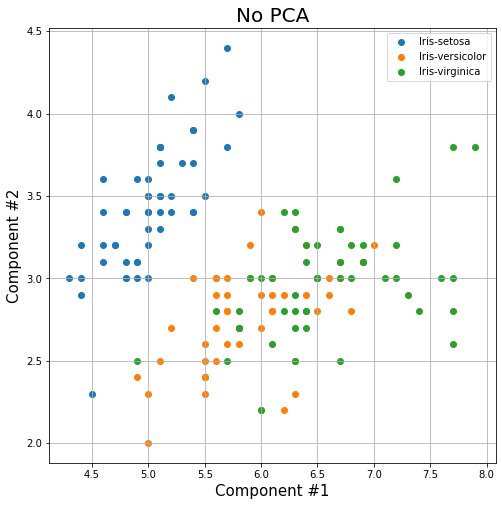

In [6]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for idt, _ in enumerate(targets):
    ax.scatter(df[df['target'] == idt].iloc[:,0], 
               df[df['target'] == idt].iloc[:,1])

ax.legend(targets)
ax.grid()
ax.set_xlabel('Component #1', fontsize = 15)
ax.set_ylabel('Component #2', fontsize = 15)
ax.set_title('No PCA', fontsize = 20)
plt.show()

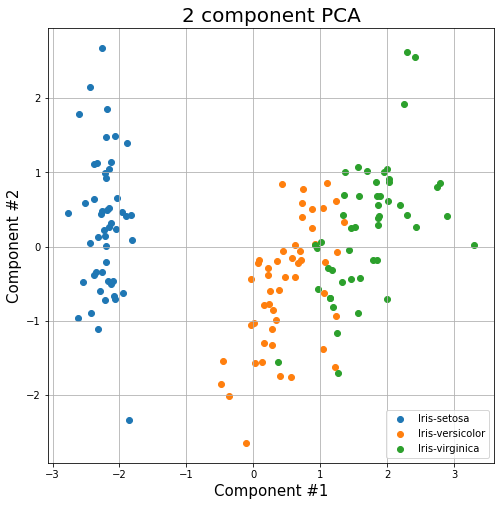

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for idt, _ in enumerate(targets):
    ax.scatter(finalDf[finalDf['target'] == idt].iloc[:,0], 
               finalDf[finalDf['target'] == idt].iloc[:,1])

ax.legend(targets)
ax.grid()
ax.set_xlabel('Component #1', fontsize = 15)
ax.set_ylabel('Component #2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.show()

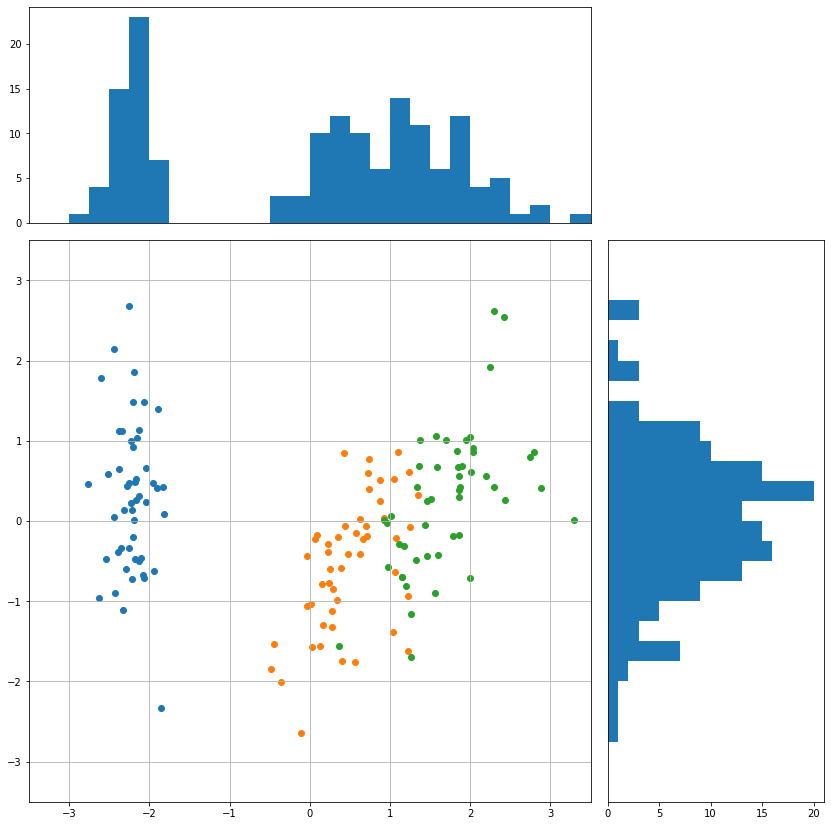

In [53]:
x = finalDf.iloc[:,0]
y = finalDf.iloc[:,1]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.25]
rect_histy = [left_h, bottom, 0.25, height]

# start with a rectangular Figure
plt.figure(1, figsize=(12, 12))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels


# the scatter plot:
for idt, _ in enumerate(targets):
    axScatter.scatter(finalDf[finalDf['target'] == idt].iloc[:,0], 
               finalDf[finalDf['target'] == idt].iloc[:,1])
    
axScatter.grid()

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axHistx.set_xticks([])
axHisty.set_yticks([])

plt.show()

-----

In [204]:
# Synthetic data
N = 900
set1 = np.vstack([np.random.normal(5, 2, N//3), np.random.normal(-5, 1, N//3), np.random.normal(-5, 1, N//3)])
set2 = np.vstack([np.random.normal(5, 2, N//3), np.random.normal(-5, 1, N//3), np.random.normal(5, 1, N//3)])
set3 = np.vstack([np.random.normal(5, 2, N//3), np.random.normal(5, 1, N//3), np.random.normal(-5, 1, N//3)])

d = np.hstack([set1, set2, set3]).T

df = pd.DataFrame(d, columns=['feature 1', 'feature 2', 'feature 3'])

# Create some correlated data also
df['feature 4'] = df['feature 1']/10

print('Synthetic data')
display(df)

# Standardizse the features
df_norm = (df-df.mean())/df.std()
print('Normalized data')
display(df_norm)


# Apply PCA
pca = decomposition.PCA(n_components=4)
PCA_df = pd.DataFrame(data = pca.fit_transform(df_norm), columns=['Component #1', 'Component #2', 'Component #3', 'Component #4'])
print("After PCA")
print("Singular values:", pca.singular_values_)
display(PCA_df)


# Append the target Label columns
target = pd.Series(np.hstack([np.zeros(N//3),np.ones(N//3), np.ones(N//3)*2]) , name='target')

df = pd.concat([df, target], axis = 1)
PCA_df = pd.concat([PCA_df, target], axis = 1)
PCA_df

Synthetic data


,feature 1,feature 2,feature 3,feature 4
0,5.811084,-5.862515,-5.000484,0.581108
1,5.962082,-3.917567,-4.024175,0.596208
2,3.317568,-5.633281,-5.656077,0.331757
3,5.373021,-4.781103,-5.216003,0.537302
4,5.489969,-5.613964,-3.974565,0.548997
...,...,...,...,...
895,4.417839,3.470186,-1.989013,0.441784
896,4.842447,5.143896,-6.471648,0.484245
897,5.975669,4.623137,-6.137932,0.597567
898,4.430041,3.616151,-5.376216,0.443004


Normalized data


,feature 1,feature 2,feature 3,feature 4
0,0.368766,-0.863306,-0.696196,0.368766
1,0.443545,-0.458269,-0.493494,0.443545
2,-0.866092,-0.815568,-0.832310,-0.866092
3,0.151825,-0.638101,-0.740942,0.151825
4,0.209742,-0.811545,-0.483194,0.209742
...,...,...,...,...
895,-0.321207,1.080235,-0.070954,-0.321207
896,-0.110930,1.428786,-1.001639,-0.110930
897,0.450274,1.320338,-0.932353,0.450274
898,-0.315164,1.110632,-0.774205,-0.315164


After PCA
Singular values: [4.24355177e+01 3.64581483e+01 2.15877339e+01 5.19439899e-15]


,Component #1,Component #2,Component #3,Component #4
0,0.546951,0.078646,1.093902,3.826185e-15
1,0.635042,-0.070809,0.662359,-1.581130e-16
2,-1.202940,0.073368,1.185612,-6.851956e-17
3,0.225231,-0.089643,0.971342,-1.669731e-16
4,0.327666,0.208750,0.910562,-8.779642e-17
...,...,...,...,...
895,-0.523004,-0.778236,-0.706474,4.473786e-17
896,-0.284064,-1.702452,-0.300481,6.969395e-17
897,0.516891,-1.633731,-0.286032,-6.520958e-17
898,-0.543535,-1.297171,-0.231242,3.514902e-17


,Component #1,Component #2,Component #3,Component #4,target
0,0.546951,0.078646,1.093902,3.826185e-15,0.0
1,0.635042,-0.070809,0.662359,-1.581130e-16,0.0
2,-1.202940,0.073368,1.185612,-6.851956e-17,0.0
3,0.225231,-0.089643,0.971342,-1.669731e-16,0.0
4,0.327666,0.208750,0.910562,-8.779642e-17,0.0
...,...,...,...,...,...
895,-0.523004,-0.778236,-0.706474,4.473786e-17,2.0
896,-0.284064,-1.702452,-0.300481,6.969395e-17,2.0
897,0.516891,-1.633731,-0.286032,-6.520958e-17,2.0
898,-0.543535,-1.297171,-0.231242,3.514902e-17,2.0


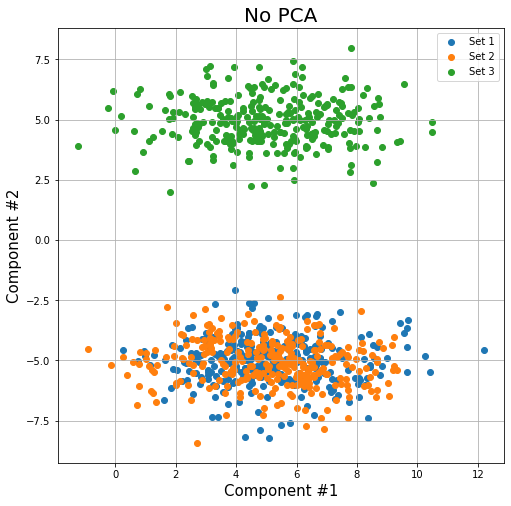

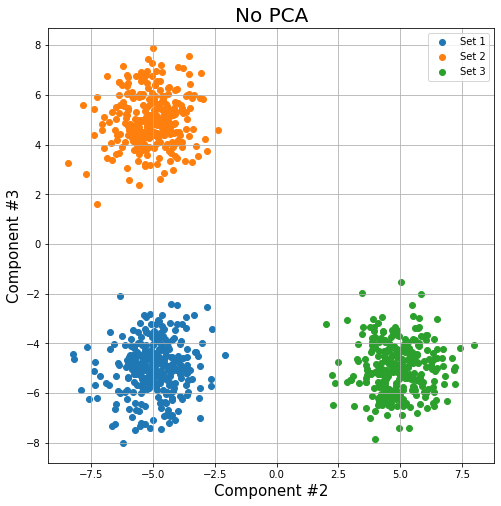

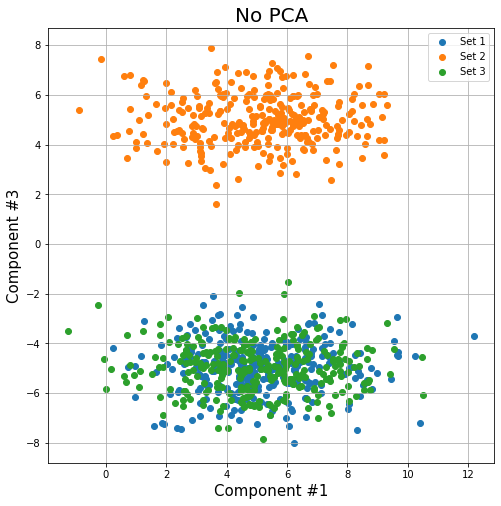

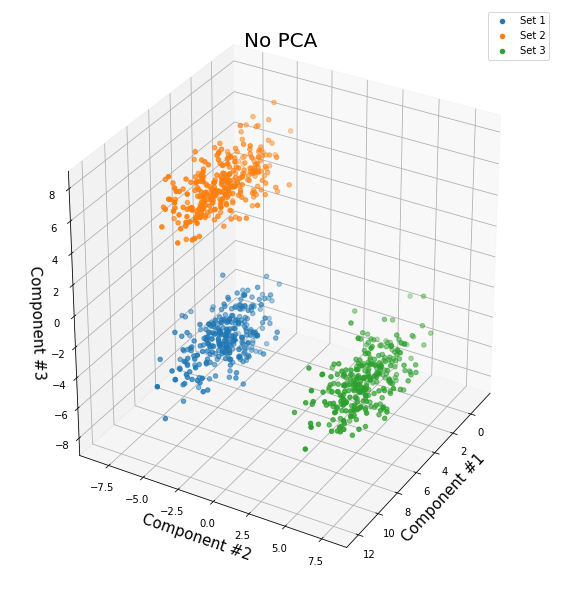

In [205]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
targets = ['Set 1', 'Set 2', 'Set 3']

for idt, _ in enumerate(targets):
    ax.scatter(df[df['target'] == idt].iloc[:,0], 
               df[df['target'] == idt].iloc[:,1])

ax.legend(targets)
ax.grid()
ax.set_xlabel('Component #1', fontsize = 15)
ax.set_ylabel('Component #2', fontsize = 15)
ax.set_title('No PCA', fontsize = 20)
plt.show()


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
targets = ['Set 1', 'Set 2', 'Set 3']

for idt, _ in enumerate(targets):
    ax.scatter(df[df['target'] == idt].iloc[:,1], 
               df[df['target'] == idt].iloc[:,2])

ax.legend(targets)
ax.grid()
ax.set_xlabel('Component #2', fontsize = 15)
ax.set_ylabel('Component #3', fontsize = 15)
ax.set_title('No PCA', fontsize = 20)
plt.show()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
targets = ['Set 1', 'Set 2', 'Set 3']

for idt, _ in enumerate(targets):
    ax.scatter(df[df['target'] == idt].iloc[:,0], 
               df[df['target'] == idt].iloc[:,2])

ax.legend(targets)
ax.grid()
ax.set_xlabel('Component #1', fontsize = 15)
ax.set_ylabel('Component #3', fontsize = 15)
ax.set_title('No PCA', fontsize = 20)
plt.show()

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=30)
targets = ['Set 1', 'Set 2', 'Set 3']

for idt, _ in enumerate(targets):
    ax.scatter(df[df['target'] == idt].iloc[:,0], 
               df[df['target'] == idt].iloc[:,1],
               df[df['target'] == idt].iloc[:,2])

ax.legend(targets)
ax.grid()
ax.set_xlabel('Component #1', fontsize = 15)
ax.set_ylabel('Component #2', fontsize = 15)
ax.set_zlabel('Component #3', fontsize = 15)
ax.set_title('No PCA', fontsize = 20)
plt.show()

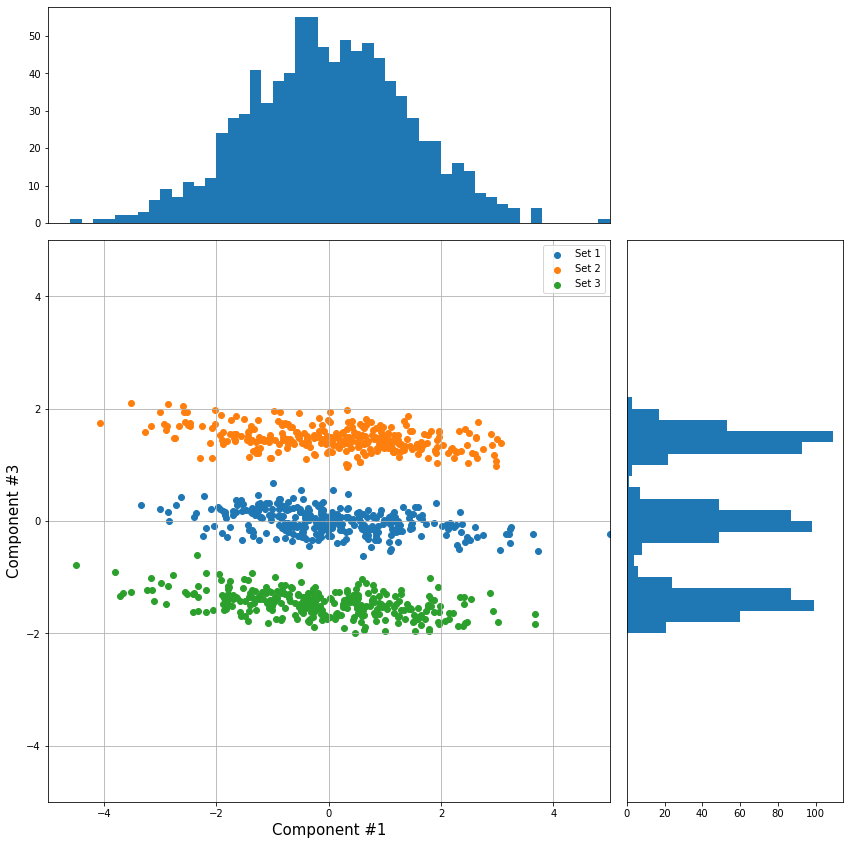

In [213]:
x = PCA_df.iloc[:,0]
y = PCA_df.iloc[:,1]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.25]
rect_histy = [left_h, bottom, 0.25, height]

# start with a rectangular Figure
plt.figure(1, figsize=(12, 12))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels


# the scatter plot:
for idt, _ in enumerate(targets):
    axScatter.scatter(PCA_df[PCA_df['target'] == idt].iloc[:,0], 
               PCA_df[PCA_df['target'] == idt].iloc[:,1])
    

# now determine nice limits by hand:
binwidth = 0.2
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axHistx.set_xticks([])
axHisty.set_yticks([])

axScatter.legend(targets)
axScatter.grid()
axScatter.set_xlabel('Component #1', fontsize = 15)
axScatter.set_ylabel('Component #3', fontsize = 15)
plt.show()

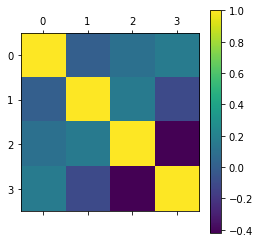

In [29]:
corrMatrix = df.iloc[:,1:].corr()
cax = plt.matshow(corrMatrix)
plt.colorbar(cax)
plt.show()